# Neural Network Classification

Some examples are:
* Binary Classifciation
* Multiclass Classification
* Multilabel Classification - single item has multiple labels or tags

In this notebook we're going to learn how to write neural networks for classification problem

A classification is where you try to classify something as one thing or another

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples,
                    noise = 0.1,
                    random_state = 42)

In [ ]:
X

array([[ 0.71210844,  0.28469831],
       [-0.67871584,  0.20727355],
       [-0.86602567,  0.34365139],
       ...,
       [-0.10655608, -0.86643656],
       [ 0.63726196, -0.85741166],
       [ 0.27181056,  0.97619727]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## Visualize the data

our data is little hard to understand right now.. let's visualize it!

In [2]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.712108,0.284698,1
1,-0.678716,0.207274,1
2,-0.866026,0.343651,1
3,-0.517648,0.620599,1
4,0.454089,-0.890466,0
...,...,...,...
995,0.261683,0.879943,0
996,-1.002156,-0.327634,0
997,-0.106556,-0.866437,1
998,0.637262,-0.857412,0


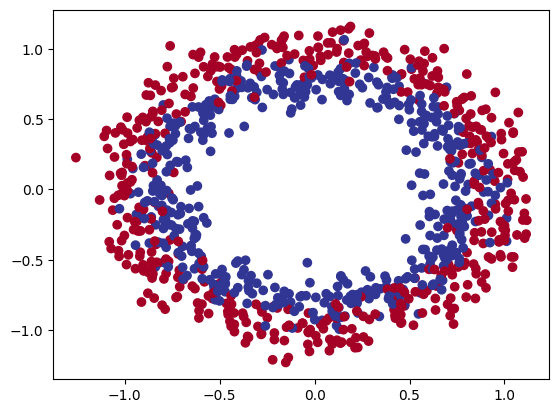

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu);

## Input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.71210844, 0.28469831]), 1)

In [ ]:
X[0].shape, y[0].shape

((2,), ())

## Steps in Modelling

In [5]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [6]:
import tensorflow as tf
import numpy as np
import wandb
from tensorflow.keras import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Accuracy, F1Score
from tensorflow.keras.losses import BinaryCrossentropy
from wandb.keras import WandbCallback, WandbMetricsLogger
from tensorflow.keras.optimizers import Adam

In [7]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train), len(y_train), len(X_test)

(800, 800, 200)

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

wandb.init(project = "Neural_Network_Classification", name="Model_1_single_Dense_layer")

model_1.fit(X_train, y_train,
            epochs = 5,
            validation_data = (X_test, y_test),
            callbacks = [WandbMetricsLogger()]
            )

wandb: Currently logged in as: rahulkrishlalwani. Use `wandb login --relogin` to force relogin


Epoch 1/5
25/25 [==============================] - 2s 23ms/step - loss: 4.3155 - accuracy: 0.4375 - val_loss: 3.6762 - val_accuracy: 0.4550
Epoch 2/5
25/25 [==============================] - 0s 5ms/step - loss: 4.3001 - accuracy: 0.4487 - val_loss: 3.6466 - val_accuracy: 0.4650
Epoch 3/5
25/25 [==============================] - 0s 10ms/step - loss: 4.2261 - accuracy: 0.4538 - val_loss: 3.6257 - val_accuracy: 0.4550
Epoch 4/5
25/25 [==============================] - 0s 4ms/step - loss: 4.1831 - accuracy: 0.4613 - val_loss: 3.6060 - val_accuracy: 0.4600
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 4.1354 - accuracy: 0.4688 - val_loss: 3.5931 - val_accuracy: 0.4550


In [ ]:
wandb.finish()
wandb.init(project = "Neural_Network_Classification", name= "model_1_200_epochs")
model_1.fit(X_train, y_train,
            epochs = 200,
            validation_data = (X_test, y_test),
            callbacks = [WandbMetricsLogger()])
wandb.finish()

model_1.evaluate(X_test,y_test)

epoch/accuracy,▁▄▅▆█
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▇▅▃▁
epoch/val_accuracy,▁█▁▅▁
epoch/val_loss,█▆▄▂▁
epoch/accuracy,0.46875
epoch/epoch,4
epoch/learning_rate,0.001
epoch/loss,4.13537
epoch/val_accuracy,0.455


Epoch 1/200
25/25 [==============================] - 0s 7ms/step - loss: 4.0745 - accuracy: 0.4700 - val_loss: 3.4584 - val_accuracy: 0.4450
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 4.0164 - accuracy: 0.4675 - val_loss: 3.4443 - val_accuracy: 0.4450
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 4.0103 - accuracy: 0.4688 - val_loss: 3.4409 - val_accuracy: 0.4450
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 4.0083 - accuracy: 0.4688 - val_loss: 3.4398 - val_accuracy: 0.4450
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 4.0071 - accuracy: 0.4688 - val_loss: 3.4387 - val_accuracy: 0.4450
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 4.0060 - accuracy: 0.4688 - val_loss: 3.4377 - val_accuracy: 0.4450
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 4.0049 - accuracy: 0.4700 - val_loss: 3.4367 - val_accuracy: 0.4450
Epoch 8/200
2

epoch/accuracy,▁▁▂▃▃▃▂▂▃▃▅▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▆▇█████
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,████▇▇▇▆▆▆▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▁▁▁▁▂▁▁▂▂▂▁▁▂▁▃▅▅▅▅▅▅▅▄▄▄▄▄▃▄▅▅▅▅▅▆▇▇██
epoch/val_loss,████▇▇▇▆▆▆▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.50125
epoch/epoch,199
epoch/learning_rate,0.001
epoch/loss,0.69568
epoch/val_accuracy,0.505


7/7 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5050


[0.6953662633895874, 0.5049999952316284]

Model only has 50% accuracy so it is like model is just guessing so try to improve it by adding extra layer

In [ ]:
tf.random.set_seed(42)

model_2 = Sequential([
    Dense(1),
    Dense(1)
])

model_2.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])
wandb.init(project = "Neural_Network_Classification", name = "Model_2_another_Dense_layer")

model_2.fit(X_train,y_train,
            epochs = 200,
            validation_data = (X_train,y_train),
            callbacks = [WandbMetricsLogger()],
            verbose = 0)
wandb.finish()

epoch/accuracy,▅▄▄▄▄▄▅▄▆▆▇█▅▅▅▄▅▄▅▅▁▄▅▂▁▁▃▄▄▄▅▅▅▅▆▇▇▇▇█
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,███████▇▇▇▇▇▆▆▆▅▅▃▃▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▅▄▄▄▄▄▅▄▅▆▇█▇▅▅▂▅▄▅▅▂▄▅▂▁▁▃▄▄▄▅▅▅▅▆▇▇▇▇█
epoch/val_loss,███████▇▇▇▇▇▆▆▆▅▄▃▃▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.4975
epoch/epoch,199
epoch/learning_rate,0.001
epoch/loss,0.81648
epoch/val_accuracy,0.4975


In [ ]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.8253 - accuracy: 0.5100


[0.8252831101417542, 0.5099999904632568]

### We still have to improve our model so tweak some

In [ ]:
wandb.init(project= "Neural_Network_Classification", name = "Model_3_3Dense_layers_100_neurons")
tf.random.set_seed(42)

model_3 = Sequential([
    Dense(100),
    Dense(100),
    Dense(1)
])

model_3.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

model_3.fit(X_train ,y_train,
            validation_data = (X_test, y_test),
            epochs = 100,
            verbose = 0,
            callbacks = [WandbMetricsLogger()])

wandb.finish()


epoch/accuracy,▅█▂▃▃▃▆▆▃▄█▃▃▂▆▇▃▃▅▇▆▆▄▅▄▄▂▁▁▄▅▆▃▁▄▇▅█▃▅
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▅▄▃▄▂▃▇▃▁▂▄▇██▃▅▇▅▅▄▅▆▂▅▇▅▅▅▇▄▅▃▆▃▅▂▅▅▅▅
epoch/val_loss,█▁▂▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▂▂▂▁▂▁▁▁▁▂▁▁▁▂▁▁▁▁
epoch/accuracy,0.495
epoch/epoch,99
epoch/learning_rate,0.001
epoch/loss,0.70067
epoch/val_accuracy,0.49


In [ ]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4900


[0.6972023248672485, 0.49000000953674316]

## Still getting 50 percent Accuracy

# let's try to Visualizse the predictions

In [ ]:
model_3.predict(X)[:10]

32/32 [==============================] - 0s 1ms/step


array([[0.50918585],
       [0.51144516],
       [0.5170316 ],
       [0.5257327 ],
       [0.4678386 ],
       [0.53145975],
       [0.53079677],
       [0.505676  ],
       [0.47286776],
       [0.54118925]], dtype=float32)

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Takes in Trained model,
  Features and labels

  Creates a meshgrid of different Values of X
  make predictions accorss meshgrid
  Plot the predictions as well as a line between zones (where each unique class falls)

  copied from :
  https://cs231n.github.io/neural-networks-case-study/
  https://github.com/GokuMohandas/Made-With-ML
  """

  x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  #check for multi-class
  if (len(y_pred[0])> 1):
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)

  else:
    print("Doing binary Classification")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c= y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



313/313 [==============================] - 1s 4ms/step
Doing binary Classification


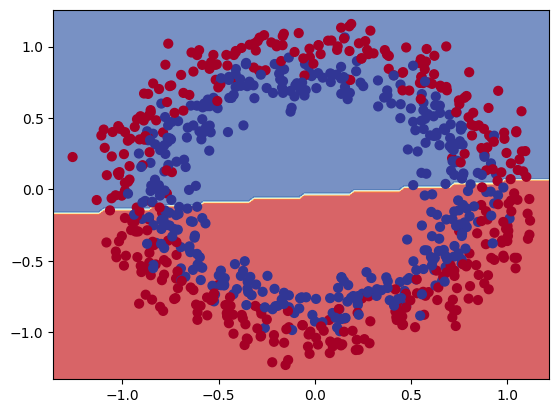

In [ ]:
plot_decision_boundary(model_3, X_train, y_train)

In [ ]:
# let's see if our model works for regression data

tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_4 = Sequential([
    Dense(100),
    Dense(100),
    Dense(1)
])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = Adam(),
                metrics = 'mae')
# np.expand_dims(X_reg_train, axis = -1).shape
wandb.init(project = "Neural_Network_Classification", name = "model_3_on_regression_data")
## WE have to change the loss function from binary to mae
model_4.fit(np.expand_dims(X_reg_train, axis =-1), y_reg_train,
            validation_data = (np.expand_dims(X_reg_test, axis = -1), y_reg_test),
            epochs = 100,
            callbacks = [WandbMetricsLogger()],
            verbose = 0)
wandb.finish()

epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/mae,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_loss,▁▇█▅▅▄▄▄▄▄▄▄▃▄▄▃▄▄▄▃▃▃▅▂▃▃▅▄▃▃▃▃▂▂▃▄▃▃▃▄
epoch/val_mae,▁▇█▅▅▄▄▄▄▄▄▄▃▄▄▃▄▄▄▃▃▃▅▂▃▃▅▄▃▃▃▃▂▂▃▄▃▃▃▄
epoch/epoch,99
epoch/learning_rate,0.001
epoch/loss,38.67291
epoch/mae,38.67291
epoch/val_loss,78.63567


2/2 [==============================] - 0s 6ms/step


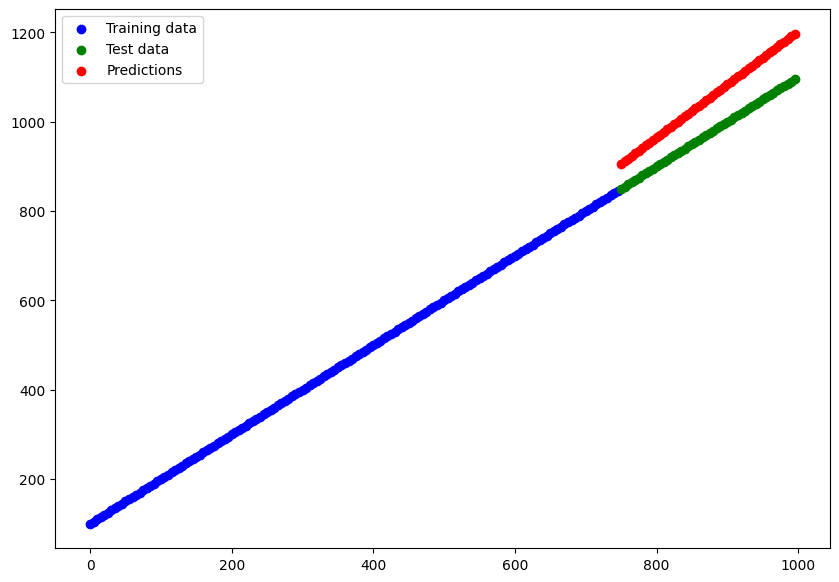

In [ ]:
y_reg_preds = model_4.predict(X_reg_test)

plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c= 'b', label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c = 'g', label = "Test data")
plt.scatter(X_reg_test, np.squeeze(y_reg_preds), c= 'r', label = "Predictions")
plt.legend()
plt.show()

## The missing is Non Linearity let's play with activation funnctions

In [ ]:
tf.random.set_seed(42)
wandb.init(project = "Neural_Network_Classification", name = "Model_5_linear_activation_1_dense")

model_5 = Sequential([
    Dense(1, activation = 'linear')
])

model_5.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

model_5.fit(X_train, y_train,
            validation_data = (X_test, y_test),
            epochs  = 100,
            verbose = 0,
            callbacks = [WandbMetricsLogger()])

wandb.finish()

epoch/accuracy,▄▄█▇▇█████████▇▇▇▇▇▇▆▆▆▄▄▄▁▁▁▁▂▂▂▂▂▂▂▃▄▃
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,██▅▅▅▅▅▅▅▅▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▂▁▁▁
epoch/val_accuracy,▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃██▆▆▆▆▆▆▆▆▁▁▁▁
epoch/val_loss,██▇▇▇▇▇▇▇▇▇▇▆▅▅▄▄▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.48125
epoch/epoch,99
epoch/learning_rate,0.001
epoch/loss,5.80895
epoch/val_accuracy,0.47


313/313 [==============================] - 1s 3ms/step
Doing binary Classification


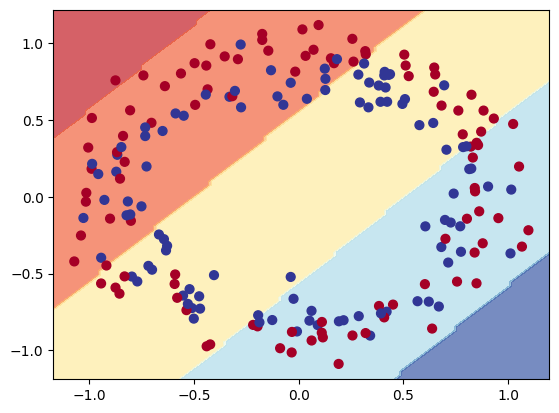

In [ ]:
plot_decision_boundary(model_5, X_test,y_test)

## Let's try build our first neural network with non linear activation function

In [ ]:
tf.random.set_seed(42)

wandb.init(project = "Neural_Network_Classification", name = "Model_6_1Dense_Relu_activation")

model_6 = Sequential([
    Dense(1, activation = 'relu')
])
model_6.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])
history = model_6.fit(X_train,y_train,
            validation_data = (X_test, y_test),
            epochs = 100,
            callbacks = [WandbMetricsLogger()],
                      verbose = 0)
wandb.finish()

epoch/accuracy,▇▇▆▇▆▇██▄▄▃▃▃▃▅▄▅▂▂▁▁▁▂▂▂▂▁▁▁▁▁▁▁▁▁▁▂▂▂▆
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▇▇▇▆▆▅▄▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁
epoch/val_accuracy,▆▇▇▇██▇█▅▄▃▃▂▂▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁
epoch/val_loss,█▇▇▇▅▅▄▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.4775
epoch/epoch,99
epoch/learning_rate,0.001
epoch/loss,4.36825
epoch/val_accuracy,0.45


## Time to replicate the multilayer neural network from playground to code

In [ ]:
tf.random.set_seed(42)

wandb.init(project = "Neural_Network_Classification", name = "model_7_4_neron_Relu")

model_7 = Sequential([
    Dense(4, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model_7.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

model_7.fit(X_train,y_train,
            validation_data = (X_test, y_test),
            epochs = 100,
            callbacks = [WandbMetricsLogger()],
            verbose = 0)

In [ ]:
wandb.finish()

epoch/accuracy,▁▂▂▃▂▂▂▃▄▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▇▇▆▇▇▇▇█
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁
epoch/val_accuracy,▁▂▃▄▅▅▅▅▆▆▆▆▆▆▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇██▇▇
epoch/val_loss,██▇▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
epoch/accuracy,0.595
epoch/epoch,99
epoch/learning_rate,0.001
epoch/loss,0.64973
epoch/val_accuracy,0.57


313/313 [==============================] - 1s 2ms/step
Doing binary Classification


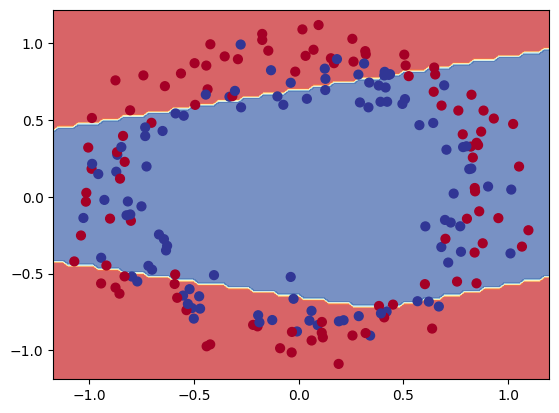

In [ ]:
plot_decision_boundary(model_7, X_test, y_test)

In [ ]:
tf.random.set_seed(42)

wandb.init(project = "Neural_Network_Classification", name = "model_8_longer_model_7")

model_8 = Sequential([
    Dense(4, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model_8.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

model_8.fit(X_train,y_train,
            validation_data = (X_test, y_test),
            epochs = 300,
            callbacks = [WandbMetricsLogger()],
            verbose = 0)

wandb.finish()

epoch/accuracy,▂▁▂▂▃▃▃▃▄▃▃▄▄▅▅▆▆▆▆▇▇▇▇▇▇▇▇█████████████
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,██████████▇▇▇▇▇▆▆▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
epoch/val_accuracy,▃▁▂▂▃▂▂▃▃▃▃▃▄▄▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇██████████
epoch/val_loss,███████▇▇▇▇▇▇▆▆▅▅▄▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.83125
epoch/epoch,299
epoch/learning_rate,0.001
epoch/loss,0.37104
epoch/val_accuracy,0.71


In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.5547 - accuracy: 0.7100


[0.5546501278877258, 0.7099999785423279]

313/313 [==============================] - 1s 3ms/step
Doing binary Classification


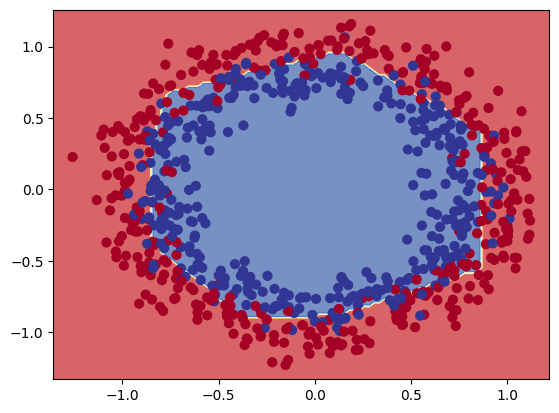

In [ ]:
plot_decision_boundary(model_8, X_train, y_train)

## Evaluating and improving the our classification

In [ ]:
tf.random.set_seed(42)

wandb.init(project = "Neural_Network_Classification", name= "model_9_lr_01")

model_9 = Sequential([
    Dense(4, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(1, activation = 'sigmoid')]
)

model_9.compile(loss = 'binary_crossentropy',
                optimizer = Adam(learning_rate = 0.01),
                metrics = ['accuracy'])

model_9.fit(X_train,y_train,
            validation_data = (X_test, y_test),
            epochs = 300,
            verbose = 0,
            callbacks = [WandbMetricsLogger()])
wandb.finish()

epoch/accuracy,▁▂▅▆▆▆▆▆▇█▇███████████████████████████▇█
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▅▅▅▅▄▃▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁
epoch/val_accuracy,▁▃▅▇▆▆▅▆▆▆▆▇▇▆▇▇▇▇▇▇██▇▆▇▇▇▇▇▇▇▇▇█▇▇▇▇▆█
epoch/val_loss,█▆▃▃▄▅▄▂▃▂▃▂▂▅▃▁▂▂▂▂▁▂▂▄▂▁▁▁▂▁▂▁▂▂▂▂▂▁▃▁
epoch/accuracy,0.84875
epoch/epoch,299
epoch/learning_rate,0.01
epoch/loss,0.33651
epoch/val_accuracy,0.745


313/313 [==============================] - 2s 5ms/step
Doing binary Classification


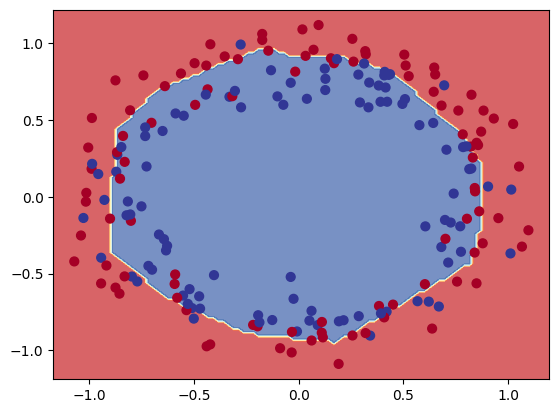

In [ ]:
plot_decision_boundary(model_9, X_test, y_test)

## Identify the ideal learning rate

* A learning rate **Callback** - you can think of callback as an extra piece of functionality, you can add to your *while* its training

In [ ]:
tf.random.set_seed(42)

wandb.init(project = "Neural_Network_Classification", name = "Ideal_learning_rate")
model_10 = tf.keras.Sequential([
    Dense(4, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model_10.compile(loss = 'binary_crossentropy',
                 optimizer = Adam(),
                 metrics = ['accuracy'])

# Create a call back
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history_10 = model_10.fit(X_train,y_train,
                          epochs = 100,
                          callbacks = [lr_schedular, WandbMetricsLogger()], verbose = 0)
wandb.finish()

epoch/accuracy,▂▂▂▂▂▂▂▂▂▂▃▃▃▃▄▆▇▇███▇▇██▇▇█▇▄▆▁▂▂▁▂▁▂▁▂
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▃▃▄▅▆█
epoch/loss,▆▆▆▆▆▆▆▆▆▆▆▆▆▅▅▄▃▃▂▂▁▂▂▁▁▂▂▁▃▅▃▆▆▆▇▇▇█▇█
epoch/lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▃▃▄▅▆█
epoch/accuracy,0.5125
epoch/epoch,99
epoch/learning_rate,8.91251
epoch/loss,0.79395
epoch/lr,8.91251


<Axes: xlabel='epochs'>

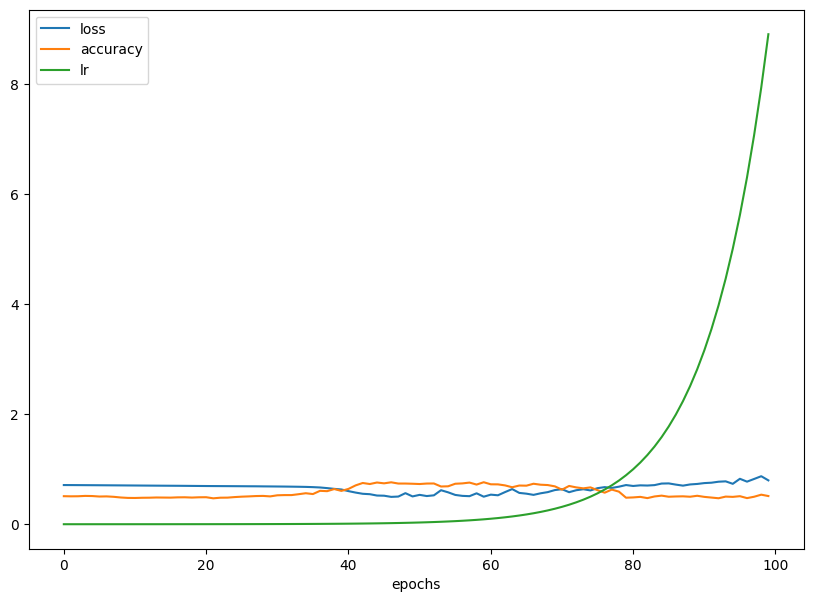

In [ ]:
pd.DataFrame(history_10.history).plot(figsize = (10, 7), xlabel = 'epochs')

Text(0.5, 1.0, 'Learning rate Vs. Loss')

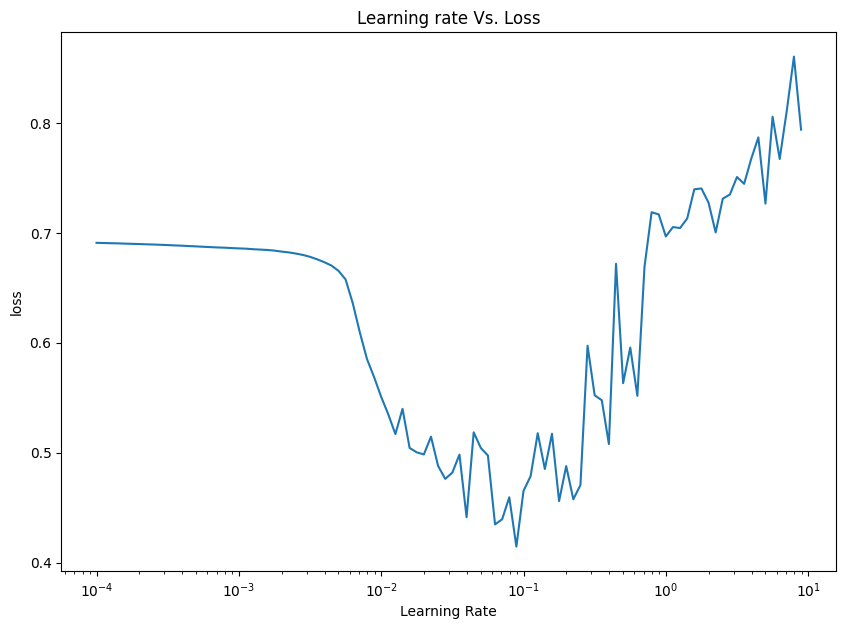

In [ ]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_10.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("loss")
plt.title("Learning rate Vs. Loss")

## Means the ideal learning rate for our model is `0.01` that is where the loss decrease fastest but note flattened out

In [9]:
tf.random.set_seed(42)
# wandb.init(project = "Neural_Network_Classification", name = "Model_10_learning_rate")

model_11 = Sequential([
    Dense(10, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model_11.compile(loss = 'binary_crossentropy',
                 optimizer = Adam(learning_rate = 0.01),
                 metrics = ['accuracy'])

model_11.fit(X_train, y_train,
             validation_data = (X_test, y_test),
             epochs = 100,
            #  callbacks = [WandbMetricsLogger()],
             verbose = 0)
# wandb.finish()

In [ ]:
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.6030 - accuracy: 0.7150


[0.6030174493789673, 0.7149999737739563]

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.9208 - accuracy: 0.5000


[0.920820415019989, 0.5]

## More Classification evaluation methods

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [11]:
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.6207 - accuracy: 0.7100
Model loss on the test set: 0.6206872463226318
Model accuracy on the test set: 71.00%


In [16]:
from sklearn.metrics import confusion_matrix
y_preds = model_11.predict(X_test)
# confusion_matrix(y_test, )
y_preds

7/7 [==============================] - 0s 5ms/step


array([[0.98902565],
       [0.7661621 ],
       [0.9865698 ],
       [0.0741438 ],
       [0.30032143],
       [0.29537094],
       [0.04935792],
       [0.03882573],
       [0.909886  ],
       [0.5704021 ],
       [0.9890538 ],
       [0.99025506],
       [0.00978286],
       [0.6391542 ],
       [0.8726472 ],
       [0.98721486],
       [0.97862494],
       [0.23715447],
       [0.9796653 ],
       [0.88541937],
       [0.36537215],
       [0.0167492 ],
       [0.97361153],
       [0.00173743],
       [0.20614456],
       [0.6457209 ],
       [0.28778782],
       [0.08211474],
       [0.02282551],
       [0.99109316],
       [0.9856452 ],
       [0.06001299],
       [0.9456217 ],
       [0.8904917 ],
       [0.5257522 ],
       [0.9594491 ],
       [0.10596924],
       [0.89274305],
       [0.8735768 ],
       [0.9629679 ],
       [0.8845535 ],
       [0.82893145],
       [0.9896492 ],
       [0.4038754 ],
       [0.22300163],
       [0.884833  ],
       [0.7908068 ],
       [0.025

oops... looks like our prediction array has come out in **Prediction probability form**.. The standard output from the sigmoid(or softmax)

In [23]:
confusion_matrix(y_test, tf.squeeze(tf.round(y_preds)))

array([[59, 41],
       [17, 83]])

## Create a pretty confusion matrix

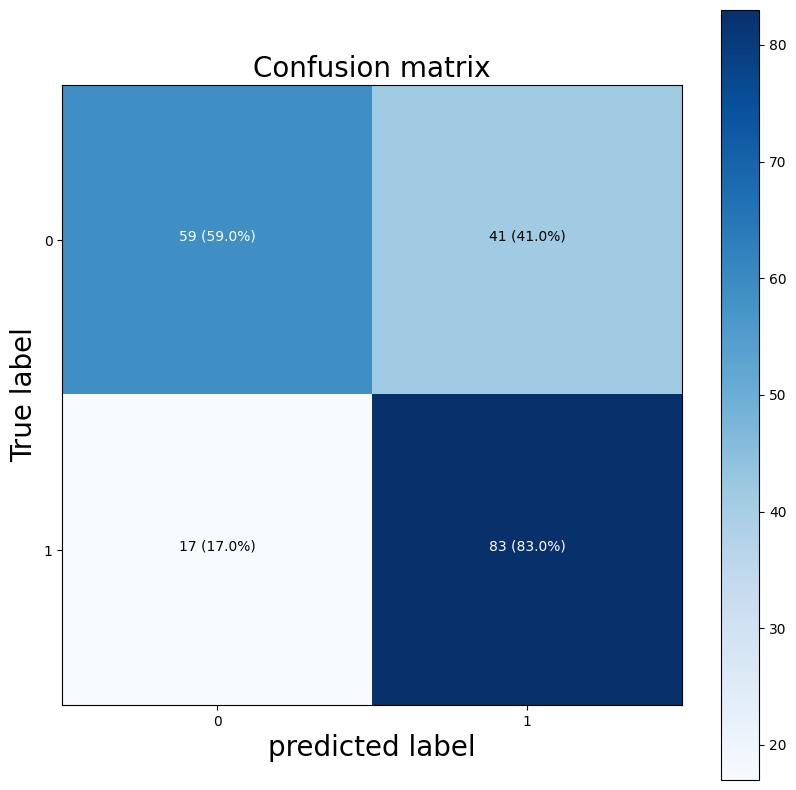

In [29]:
import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test , tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
n_classes = cm.shape[0]

# let's prettify it
fig, ax = plt.subplots(figsize = figsize)
## Create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title = "Confusion matrix",
       xlabel = "predicted label",
       ylabel = "True label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)


# set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
# Set threshold for different colors
threshold = (cm.max() + cm.min())/2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)',
           horizontalalignment = 'center',
           color = 'white' if cm[i, j]> threshold else 'black')